In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go

In [2]:
tracks = pd.read_csv('../data/processed/tracks.csv', index_col=0)

In [3]:
features = pd.read_csv('../data/processed/track_features.csv', index_col=0)

In [4]:
tracks.head()

,played_at,name,duration_ms,id,popularity,artist,album,album_id
0,2019-12-12T10:57:09.063Z,Trans Siberian,472769,2mSCnlqQ0mvHrPyVLuo5kE,18,Juno Reactor,The Golden Sun of the Great East,4cgvNUnZM2QHxhhY12lWk7
1,2019-12-12T10:49:16.309Z,Guillotine,417761,0m6n7veetHyEr3NuUreI4h,20,Juno Reactor,The Golden Sun of the Great East,4cgvNUnZM2QHxhhY12lWk7
2,2019-12-12T10:42:18.604Z,Invisible,525548,3Jw9OuPa9AXjaJXKbic26y,21,Juno Reactor,The Golden Sun of the Great East,4cgvNUnZM2QHxhhY12lWk7
3,2019-12-12T10:33:32.932Z,Final Frontier,602813,78WeMIirolQgyaUqFnqOCi,26,Juno Reactor,The Golden Sun of the Great East,4cgvNUnZM2QHxhhY12lWk7
4,2019-12-11T20:55:29.018Z,O pato,122866,6u6E9DZgzyyo1oFofn7zIs,45,João Gilberto,Bossa Nova Essentials,2hVlKPHcnN1xpdnIQOfTfi


In [5]:
features.head()

,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature
0,03d5V0uvYp3hU7wE9mJzJa,0.022500,0.454,0.447,0.88900,0.1030,-13.387,0.0273,74.474,0.429,9,0,4
1,0CufyIMTfy8YFJXjNfDXvl,0.528000,0.326,0.279,0.69600,0.2220,-15.306,0.0336,136.480,0.148,7,1,4
2,121IyQ9weu5MXAfXAFVDcH,0.000334,0.454,0.579,0.00625,0.1630,-9.987,0.0286,84.146,0.221,0,1,4
3,1Nc5cKez6FmEbsFwYwUbqg,0.795000,0.527,0.825,0.00000,0.0973,-5.025,0.0939,95.958,0.772,3,1,4
4,1TbgAIgWDO1qzwem0g0Qyy,0.877000,0.487,0.659,0.31100,0.1340,-10.989,0.0540,107.135,0.854,10,0,4


In [6]:
data = pd.merge(tracks, features, on='id')
data.played_at = pd.to_datetime(data.played_at)
data.sort_values('played_at', inplace=True)
data.reset_index(inplace=True)
del data['index']

In [7]:
data.head()

,played_at,name,duration_ms,id,popularity,artist,album,album_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature
0,2019-08-05 12:20:25.523000+00:00,The Pheonix Flown,127986,5L8qzR3rsT9747tUeNGUBc,4,Steve Hackett,Beyond the Shrouded Horizon,3Ia0eMk5Eosw8JxZ5qS3kK,0.226,0.2950,0.879,0.866000,0.0962,-6.222,0.0510,77.898,0.159,9,1,4
1,2019-08-05 12:21:09.612000+00:00,Wanderlust,44106,3TeTf7QjiNljQfH4IEiSrg,3,Steve Hackett,Beyond the Shrouded Horizon,3Ia0eMk5Eosw8JxZ5qS3kK,0.990,0.5470,0.113,0.972000,0.1120,-23.239,0.0791,95.002,0.264,0,1,3
2,2019-08-05 12:23:50.676000+00:00,Til These Eyes,160933,4hT44AufFjOtPosMvHvRAR,5,Steve Hackett,Beyond the Shrouded Horizon,3Ia0eMk5Eosw8JxZ5qS3kK,0.762,0.2930,0.308,0.000179,0.1330,-11.543,0.0335,88.206,0.159,0,1,4
3,2019-08-05 12:27:21.625000+00:00,Prairie Angel,178693,5ZiRwY5m25D15oEzPq5Y2U,4,Steve Hackett,Beyond the Shrouded Horizon,3Ia0eMk5Eosw8JxZ5qS3kK,0.120,0.0892,0.497,0.906000,0.3280,-8.198,0.0365,169.409,0.327,0,1,3
4,2019-08-05 12:33:18.226000+00:00,A Place Called Freedom,356600,1wrRTfHIrmDy3mBVdYGTEF,4,Steve Hackett,Beyond the Shrouded Horizon,3Ia0eMk5Eosw8JxZ5qS3kK,0.660,0.2770,0.579,0.098300,0.2920,-7.654,0.0326,83.947,0.131,2,1,4


In [8]:
data.shape

(3166, 20)

In [9]:
daily_count = data.groupby(data.played_at.dt.date).id.count()
daily_count_index = pd.date_range(data.played_at.dt.date.min(), 
                                  data.played_at.dt.date.max(), 
                                  freq='D')

daily_count = daily_count.reindex(daily_count_index).fillna(0.)
daily_count = daily_count.to_frame().reset_index()
daily_count.columns = ['date', 'count']

In [10]:
fig = px.line(daily_count, x="date", y="count")
plot(fig)

'temp-plot.html'

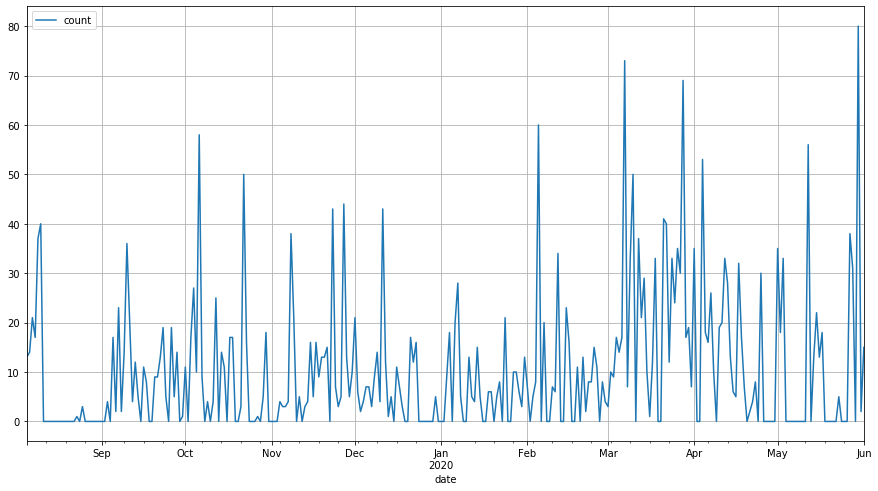

In [11]:
daily_count.set_index('date').plot(figsize=(15, 8), 
                 style='-', 
                 grid=True)

In [12]:
data['day_of_week'] = data.played_at.dt.dayofweek

data['hour'] = data.played_at.dt.hour

data['month'] = data.played_at.dt.month
data['year'] = data.played_at.dt.year

hourly_count = (data.groupby(['year', 'month', 'day_of_week', 'hour'])
                .id
                .count()
                .unstack(['year', 'month'])
                .fillna(0.))

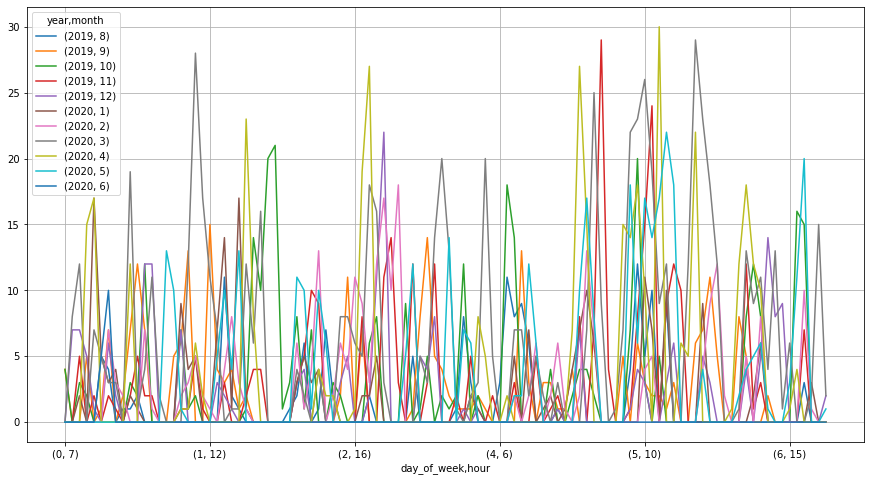

In [13]:
hourly_count.fillna(0.).plot(figsize=(15, 8), 
                             grid=True)

In [14]:
idx = [(d, h) for d in range(7) for h in range(24)]

In [15]:
hourly_count = hourly_count.reindex(idx).fillna(0.)

In [16]:
df_to_plot = hourly_count.mean(axis=1).to_frame()
df_to_plot['x'] = list(range(len(idx)))
fig = px.line(df_to_plot, x="x", y=0)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(idx))),
        ticktext = [','.join([str(ii) for ii in i]) for i in idx]
    )
)
plot(fig)


'temp-plot.html'

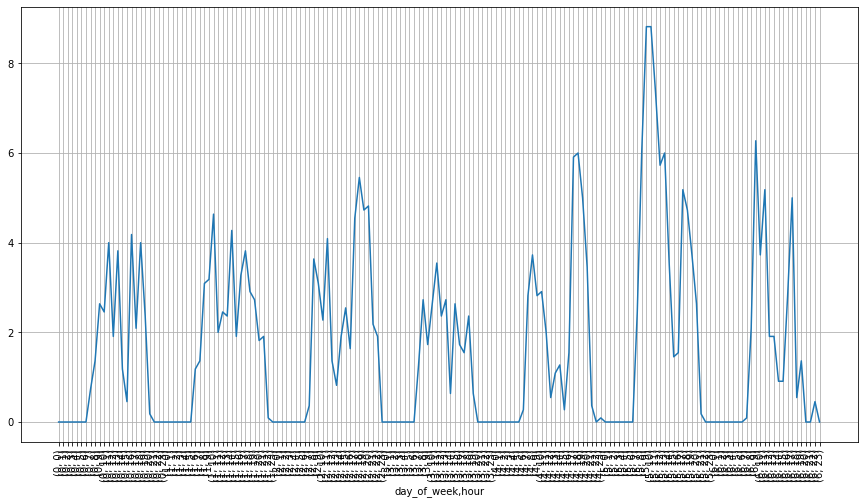

In [17]:
ax = hourly_count.mean(axis=1).plot(figsize=(15, 8), 
                                    grid=True, rot=90)

ax.set_xticks(list(range(0, 7*24)))
ax.set_xticklabels(list(hourly_count.mean(axis=1).index));

In [18]:
daily_duration = data.groupby(data.played_at.dt.date).duration_ms.sum()
daily_duration_index = pd.date_range(data.played_at.dt.date.min(), 
                                  data.played_at.dt.date.max(), 
                                  freq='D')

daily_duration = daily_duration.reindex(daily_duration_index).fillna(0.)
daily_duration = daily_duration.to_frame().reset_index()
daily_duration.columns = ['date', 'total_play_ms']

daily_duration['total_play_mins'] = daily_duration.total_play_ms/(1000*60)

In [19]:
fig = px.line(daily_duration, x="date", y="total_play_mins")
plot(fig)

'temp-plot.html'

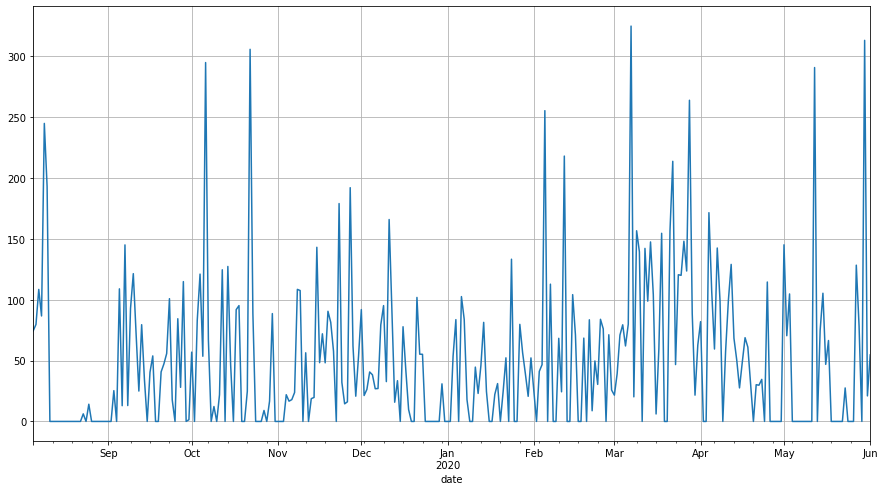

In [20]:
daily_duration.set_index('date').total_play_mins.plot(figsize=(15, 8), 
                 style='-', 
                 grid=True)